## Pandas GroupBy Operations

### Understanding groupby objects

In [ ]:
import pandas as pd

In [ ]:
titanic = pd.read_csv('titanic.csv')

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [ ]:
titanic_slice = titanic.iloc[:10, [2,3]]

In [ ]:
titanic_slice

,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0
8,female,27.0
9,female,14.0


groupby()

In [ ]:
titanic_slice.groupby('sex')   # it's a groupby object

In [ ]:
gbo = titanic_slice.groupby('sex')

In [ ]:
type(gbo)

pandas.core.groupby.generic.DataFrameGroupBy

In [ ]:
gbo.groups    # accessing the groups within gbo

{'female': [1, 2, 3, 8, 9], 'male': [0, 4, 5, 6, 7]}

In [ ]:
l = list(gbo)   # passing it to a list

In [ ]:
l

[('female',
        sex   age
  1  female  38.0
  2  female  26.0
  3  female  35.0
  8  female  27.0
  9  female  14.0),
 ('male',
      sex   age
  0  male  22.0
  4  male  35.0
  5  male   NaN
  6  male  54.0
  7  male   2.0)]

In [ ]:
len(l)

2

In [ ]:
l[0]

('female',
       sex   age
 1  female  38.0
 2  female  26.0
 3  female  35.0
 8  female  27.0
 9  female  14.0)

In [ ]:
type(l[0])

tuple

In [ ]:
l[0][0]  # string 

'female'

In [ ]:
l[0][1]  # second element in the first tuple is a dataframe

,sex,age
1,female,38.0
2,female,26.0
3,female,35.0
8,female,27.0
9,female,14.0


In [ ]:
l[1][1]

,sex,age
0,male,22.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0


In [ ]:
titanic_slice_f = titanic_slice.loc[titanic_slice.sex == 'female']
titanic_slice_f

,sex,age
1,female,38.0
2,female,26.0
3,female,35.0
8,female,27.0
9,female,14.0


In [ ]:
titanic_slice_m = titanic_slice.loc[titanic_slice.sex == 'male']
titanic_slice_m

,sex,age
0,male,22.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0


In [ ]:
titanic_slice_f.equals(l[0][1])   # both are same!

True

In [ ]:
for x in gbo:       # printing the dataframes within gbo which are at index 1 in each tuple
    print(x[1])

      sex   age
1  female  38.0
2  female  26.0
3  female  35.0
8  female  27.0
9  female  14.0
    sex   age
0  male  22.0
4  male  35.0
5  male   NaN
6  male  54.0
7  male   2.0


## Splitting with many keys

In [ ]:
summer = pd.read_csv('summer.csv')
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [ ]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [ ]:
summer.Country.nunique()

147

In [ ]:
split1 = summer.groupby('Country')   # splitting into countries

In [ ]:
l = list(split1)    # in this list, there are 147 tuples with first element as the country name and second as the corresponding dataframe

In [ ]:
len(l)

147

In [ ]:
l[100][1]    #101th country with all details

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5031,1928,Amsterdam,Aquatics,Swimming,"YLDEFONSO, Teofilo",PHI,Men,200M Breaststroke,Bronze
5741,1932,Los Angeles,Aquatics,Swimming,"YLDEFONSO, Teofilo",PHI,Men,200M Breaststroke,Bronze
5889,1932,Los Angeles,Athletics,Athletics,"TORIBIO, Simeon Galvez",PHI,Men,High Jump,Bronze
5922,1932,Los Angeles,Boxing,Boxing,"VILLANUEVA, Jose",PHI,Men,50.8 - 54KG (Bantamweight),Bronze
6447,1936,Berlin,Athletics,Athletics,"WHITE, Miguel S.",PHI,Men,400M Hurdles,Bronze
11005,1964,Tokyo,Boxing,Boxing,"VILLANUEVA, Anthony N.",PHI,Men,54 - 57KG (Featherweight),Silver
18513,1988,Seoul,Boxing,Boxing,"SERANTES, Leopoldo",PHI,Men,- 48KG (Light-Flyweight),Bronze
20184,1992,Barcelona,Boxing,Boxing,"VELASCO, Roel",PHI,Men,- 48KG (Light-Flyweight),Bronze
21927,1996,Atlanta,Boxing,Boxing,"VELASCO, Mansueto",PHI,Men,- 48KG (Light-Flyweight),Silver


splitting with 2 columns using 'by' param

In [ ]:
split2 = summer.groupby(by = ['Country', 'Gender'])   

In [ ]:
l2 = list(split2) # in this list, there are 147 tuples with first element as the (country name, gender) and second as the corresponding dataframe

In [ ]:
len(l2)

236

In [ ]:
l2[104]

(('IRL', 'Women'),
        Year     City      Sport Discipline                Athlete Country  \
 21356  1996  Atlanta   Aquatics   Swimming  SMITH, Michelle Marie     IRL   
 21369  1996  Atlanta   Aquatics   Swimming  SMITH, Michelle Marie     IRL   
 21375  1996  Atlanta   Aquatics   Swimming  SMITH, Michelle Marie     IRL   
 21381  1996  Atlanta   Aquatics   Swimming  SMITH, Michelle Marie     IRL   
 23627  2000   Sydney  Athletics  Athletics      O'SULLIVAN, Sonia     IRL   
 29896  2012   London     Boxing     Boxing          TAYLOR, Katie     IRL   
 
       Gender                   Event   Medal  
 21356  Women          200M Butterfly  Bronze  
 21369  Women  200M Individual Medley    Gold  
 21375  Women          400M Freestyle    Gold  
 21381  Women  400M Individual Medley    Gold  
 23627  Women                   5000M  Silver  
 29896  Women                   60 KG    Gold  )

In [ ]:
l2[104][0]   # first element

('IRL', 'Women')

In [ ]:
l2[104][1]   # second element, the dataframe

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
21356,1996,Atlanta,Aquatics,Swimming,"SMITH, Michelle Marie",IRL,Women,200M Butterfly,Bronze
21369,1996,Atlanta,Aquatics,Swimming,"SMITH, Michelle Marie",IRL,Women,200M Individual Medley,Gold
21375,1996,Atlanta,Aquatics,Swimming,"SMITH, Michelle Marie",IRL,Women,400M Freestyle,Gold
21381,1996,Atlanta,Aquatics,Swimming,"SMITH, Michelle Marie",IRL,Women,400M Individual Medley,Gold
23627,2000,Sydney,Athletics,Athletics,"O'SULLIVAN, Sonia",IRL,Women,5000M,Silver
29896,2012,London,Boxing,Boxing,"TAYLOR, Katie",IRL,Women,60 KG,Gold


## split-apply-combine explained


we apply a fxn to our split dataframe in this.

In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic_slice = titanic.iloc[:10, [2,3]]
titanic_slice

,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0
8,female,27.0
9,female,14.0


In [4]:
list(titanic_slice.groupby('sex'))[0][1]

,sex,age
1,female,38.0
2,female,26.0
3,female,35.0
8,female,27.0
9,female,14.0


In [6]:
list(titanic_slice.groupby('sex'))[1][1]

,sex,age
0,male,22.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0


In [7]:
titanic_slice.groupby('sex').mean()   # applying mean to the dataset, adjusting for NaN is done automatically.

,age
sex,
female,28.00
male,28.25


In [8]:
titanic.groupby('sex').sum()    # applying on the whole dataset and not the slice

,survived,pclass,age,sibsp,parch,fare
sex,,,,,,
female,233,678,7286.00,218,204,13966.6628
male,109,1379,13919.17,248,136,14727.2865


In [10]:
titanic.groupby('sex').survived.sum()    # method chaining

sex
female    233
male      109
Name: survived, dtype: int64

In [12]:
titanic.groupby('sex')[['fare','age' ]].sum()

,fare,age
sex,,
female,13966.6628,7286.00
male,14727.2865,13919.17


In [14]:
new_df = titanic.groupby('sex').mean()
new_df

,survived,pclass,age,sibsp,parch,fare
sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

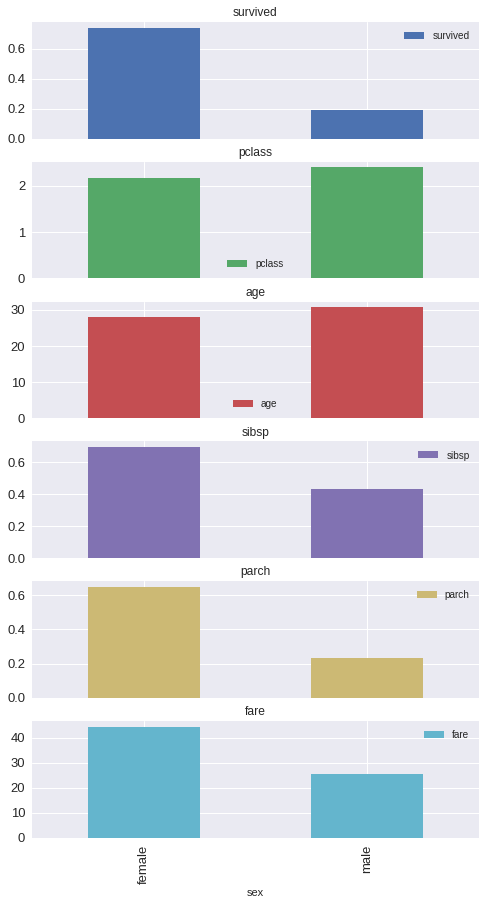

In [16]:
new_df.plot(kind = 'bar', subplots = True, figsize =(8,15), fontsize = 13)
plt.show()